In [6]:
import torch
from torch import (optim, nn)

from torch.utils.data import (
    DataLoader,
    TensorDataset,
    random_split
)

import numpy as np

# User-defined classes
from utils.base import (
    LogisticRegression,
    Trainer
)

# User-defined functions
from utils.preprocess import clusters

# Plotting
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
plt.rcParams["font.family"] = "monospace"

In [7]:
# Constants
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DTYPE = torch.float32
BATCH_SIZE = 32
NUM_EPOCHS = 20
SIZE = 100
GENERATOR = torch.Generator().manual_seed(42)

print(f"Device has been set to: {torch.cuda.get_device_properties(DEVICE).name}")

Device has been set to: NVIDIA GeForce RTX 4060 Laptop GPU


In [8]:
X, y = clusters(SIZE, std0 = 1.3, std1 = 1.6)

In [9]:
print("Generated X:", X, "\nGenerated y:", y, sep='\n')
print("\nShape of X: ", X.shape, "\nShape of y: ", y.shape, sep='\n')

Generated X:
tensor([[-1.4350, -3.9049],
        [-3.1385, -3.3611],
        [-3.7079, -4.0000],
        [-2.3074, -2.3929],
        [-2.4412, -2.9694],
        [-1.9070, -4.4542],
        [-3.5891, -2.5735],
        [-3.4869, -3.0090],
        [-1.8165, -3.5720],
        [-2.6021, -3.7818],
        [-2.6838, -3.4738],
        [-2.5980, -3.6407],
        [-4.4240, -1.8124],
        [-1.5745, -3.8947],
        [-3.0949, -0.8902],
        [-3.2460, -3.5831],
        [-2.5316, -2.8152],
        [-1.7899, -4.2523],
        [-3.4725, -4.5164],
        [-4.6144, -2.9208],
        [-2.7312, -2.4476],
        [-4.2400, -4.3903],
        [-3.6073, -0.8521],
        [-2.9790, -5.7721],
        [-2.8379, -3.1792],
        [-0.8780, -3.4859],
        [-2.9013, -1.2178],
        [-3.5916, -2.7944],
        [-2.5262, -3.0799],
        [-5.2994, -1.9778],
        [-4.8448, -3.6216],
        [-4.8998, -4.1523],
        [-3.5259, -2.3643],
        [-1.6826, -3.4226],
        [-2.9836, -3.0617],
       

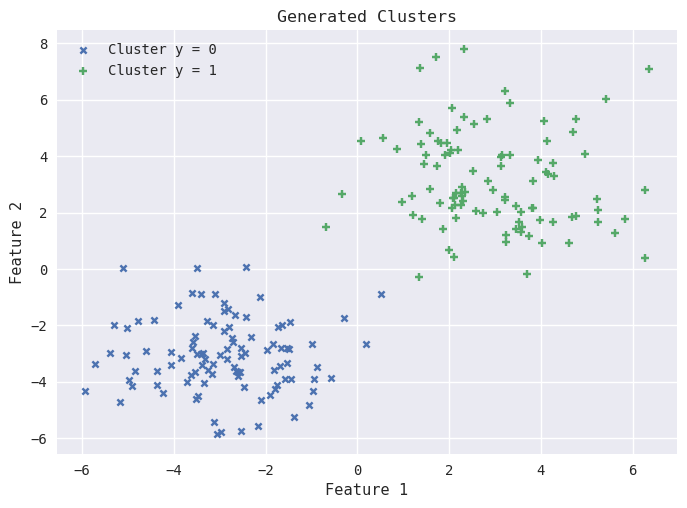

In [10]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x', label='Cluster y = 0', s=20)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', label='Cluster y = 1', s=40)
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Clusters')
plt.show()

In [11]:
Model = LogisticRegression(in_dims=2).to(DEVICE)

In [12]:
Data = TensorDataset(X, y)
Data.tensors

(tensor([[-1.4350, -3.9049],
         [-3.1385, -3.3611],
         [-3.7079, -4.0000],
         [-2.3074, -2.3929],
         [-2.4412, -2.9694],
         [-1.9070, -4.4542],
         [-3.5891, -2.5735],
         [-3.4869, -3.0090],
         [-1.8165, -3.5720],
         [-2.6021, -3.7818],
         [-2.6838, -3.4738],
         [-2.5980, -3.6407],
         [-4.4240, -1.8124],
         [-1.5745, -3.8947],
         [-3.0949, -0.8902],
         [-3.2460, -3.5831],
         [-2.5316, -2.8152],
         [-1.7899, -4.2523],
         [-3.4725, -4.5164],
         [-4.6144, -2.9208],
         [-2.7312, -2.4476],
         [-4.2400, -4.3903],
         [-3.6073, -0.8521],
         [-2.9790, -5.7721],
         [-2.8379, -3.1792],
         [-0.8780, -3.4859],
         [-2.9013, -1.2178],
         [-3.5916, -2.7944],
         [-2.5262, -3.0799],
         [-5.2994, -1.9778],
         [-4.8448, -3.6216],
         [-4.8998, -4.1523],
         [-3.5259, -2.3643],
         [-1.6826, -3.4226],
         [-2.9

In [ ]:
trainData, valData = random_split(Data, (0.8, 0.2), generator=GENERATOR)

trainLoader = DataLoader(trainData, batch_size=BATCH_SIZE, generator=GENERATOR, shuffle=True)
valLoader = DataLoader(valData, batch_size=BATCH_SIZE, generator=GENERATOR, shuffle=True)

In [14]:
trainer = Trainer(
    Model,
    trainLoader,
    valLoader,
    optimizer=optim.SGD(Model.parameters(), lr=.1),
    criterion=nn.BCELoss(reduction='mean'),        # Binary Cross-entropy Loss (For classification)
    device=DEVICE
)

In [15]:
train_loss, val_loss = trainer.train(num_epochs=NUM_EPOCHS)

	Epoch 1 | Weights: tensor([-1.7257,  0.8174], device='cuda:0')
	Epoch 1 | Bias: tensor([1.3996], device='cuda:0')
	Epoch 1 | Weights: tensor([-1.4724,  1.0609], device='cuda:0')
	Epoch 1 | Bias: tensor([1.3702], device='cuda:0')
	Epoch 1 | Weights: tensor([-1.2827,  1.2047], device='cuda:0')
	Epoch 1 | Bias: tensor([1.3691], device='cuda:0')
	Epoch 1 | Weights: tensor([-1.0916,  1.3194], device='cuda:0')
	Epoch 1 | Bias: tensor([1.3539], device='cuda:0')
	Epoch 1 | Weights: tensor([-0.9516,  1.4195], device='cuda:0')
	Epoch 1 | Bias: tensor([1.3216], device='cuda:0')
Epoch 1/20 | Loss: 2.2692
	| Validation Loss: 0.7434

	Epoch 2 | Weights: tensor([-0.8199,  1.4774], device='cuda:0')
	Epoch 2 | Bias: tensor([1.3116], device='cuda:0')
	Epoch 2 | Weights: tensor([-0.6942,  1.5357], device='cuda:0')
	Epoch 2 | Bias: tensor([1.2969], device='cuda:0')
	Epoch 2 | Weights: tensor([-0.6425,  1.5710], device='cuda:0')
	Epoch 2 | Bias: tensor([1.2883], device='cuda:0')
	Epoch 2 | Weights: tensor

In [16]:
print("Train Loss:", train_loss, "\nValidation Loss:", val_loss, sep='\n')

Train Loss:
{0: 2.2692272901535033, 1: 0.4539055585861206, 2: 0.19898971617221833, 3: 0.12353097647428513, 4: 0.09070521742105483, 5: 0.0712515503168106, 6: 0.05903390478342772, 7: 0.049746391177177426, 8: 0.04315973948687315, 9: 0.03801906295120716, 10: 0.03410741994157433, 11: 0.030808502808213234, 12: 0.027958551049232484, 13: 0.025723132491111755, 14: 0.02379729561507702, 15: 0.02217829106375575, 16: 0.02066097091883421, 17: 0.01947319144383073, 18: 0.018352466728538276, 19: 0.017423678003251553}

Validation Loss:
{0: 0.7434341609477997, 1: 0.270141065120697, 2: 0.08654036745429039, 3: 0.0836016833782196, 4: 0.041742959059774876, 5: 0.07885671313852072, 6: 0.029510509222745895, 7: 0.04555445350706577, 8: 0.026193702593445778, 9: 0.021025046706199646, 10: 0.028501611202955246, 11: 0.01782088470645249, 12: 0.019004217814654112, 13: 0.024029457941651344, 14: 0.04629905056208372, 15: 0.0214841328561306, 16: 0.03890060447156429, 17: 0.01334155339282006, 18: 0.012866418954217806, 19: 0.0

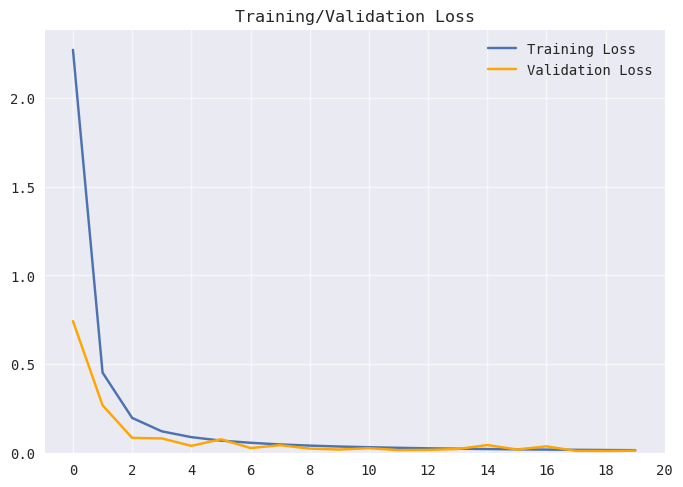

In [17]:
plt.plot(
    train_loss.keys(),
    train_loss.values(),
    label="Training Loss"
);
plt.plot(
    val_loss.keys(),
    val_loss.values(),
    color="orange",
    label="Validation Loss"
);
plt.ylim(bottom=-0);
plt.xticks(np.linspace(0, 20, 11));
plt.grid(True, alpha = .6);
plt.title("Training/Validation Loss");
plt.legend(loc='best');
plt.show()

In [18]:
print(f"Predicted Model Parameters:", "Weights: {}".format(Model.w), "Bias: {}".format(Model.b), sep="\n")

Predicted Model Parameters:
Weights: Parameter containing:
tensor([0.5060, 1.9308], device='cuda:0', requires_grad=True)
Bias: Parameter containing:
tensor([1.0834], device='cuda:0', requires_grad=True)


In [19]:
T = torch.linspace(X.min(), X.max(), SIZE, dtype=DTYPE, device=DEVICE).reshape(SIZE, 1)

slope = -Model.w[0] / Model.w[1]
interc = -Model.b / Model.w[1]
boundary = slope * T + interc

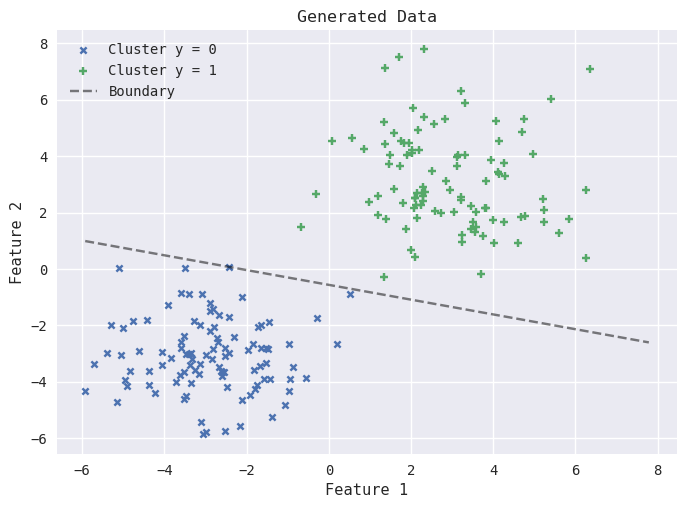

In [20]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x', label='Cluster y = 0', s=20)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', label='Cluster y = 1', s=40)
# Decision Boundary
plt.plot(
    T.detach().cpu(),
    boundary.detach().cpu(),
    alpha=.5,
    color='black',
    linestyle='--',
    label="Boundary"
);

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Generated Data");
plt.legend(loc='best');
plt.show();